In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import geopandas as gpd

df = pd.read_csv("../CSV/2010-2021.csv")

# create grouping of data using specified column
groupby_borough = df.groupby(['BOROUGH'])

# creates a copy of specified entry within the column group
brooklyn = groupby_borough.get_group(('BROOKLYN',)).copy()
brooklyn.drop('LOWEST SALE PRICE', axis=1, inplace=True)
brooklyn.drop('HIGHEST SALE PRICE', axis=1, inplace=True)

# group further by home type
groupby_home = brooklyn.groupby(['TYPE OF HOME'])
two = groupby_home.get_group(('02 TWO FAMILY HOMES',)).copy()

# set up to do regession 
hood_names_two = two['NEIGHBORHOOD'].unique()
groupby_hood = two.groupby(['NEIGHBORHOOD'])
# addresses small samples
small_sample = [] 

# prediction model
dic_two = {}
for h in hood_names_two:
    temp = groupby_hood.get_group((h,)).copy()
    # print(h)
    if h in small_sample:
        dic_two[h] = temp['AVERAGE SALE PRICE'].item()
    else:
        X = temp[['YEAR', 'MEDIAN SALE PRICE', 'NUMBER OF SALES']]
        y = temp['AVERAGE SALE PRICE']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        dic_two[h] = y_pred[0]

# map of neighborhood
shape = gpd.read_file("../nynta2020_24b/nynta2020.shp")

# removes all borough that isn't the working set
to_drop = shape[shape["BoroName"] != "Brooklyn"].index 
shape.drop(to_drop, inplace=True) 

# removes all other columns that we don't really care for
shape = shape.drop(columns=["BoroCode", "BoroName", "CountyFIPS", "NTA2020", "NTAAbbrev", "NTAType", "CDTA2020", "Shape_Leng", "Shape_Area", "CDTAName"])

hood_names_two 

array(['BATH BEACH', 'BAY RIDGE', 'BEDFORD STUYVESANT', 'BENSONHURST',
       'BERGEN BEACH', 'BOERUM HILL', 'BOROUGH PARK', 'BRIGHTON BEACH',
       'BROOKLYN HEIGHTS', 'BROWNSVILLE', 'BUSH TERMINAL', 'BUSHWICK',
       'CANARSIE', 'CARROLL GARDENS', 'CLINTON HILL', 'COBBLE HILL',
       'COBBLE HILL-WEST', 'CROWN HEIGHTS', 'CYPRESS HILLS',
       'DOWNTOWN-FULTON FERRY', 'DOWNTOWN-FULTON MALL', 'DYKER HEIGHTS',
       'EAST NEW YORK', 'FLATBUSH-CENTRAL', 'FLATBUSH-EAST',
       'FLATBUSH-LEFFERTS GARDEN', 'FLATBUSH-NORTH', 'FLATLANDS',
       'FORT GREENE', 'GERRITSEN BEACH', 'GOWANUS', 'GRAVESEND',
       'GREENPOINT', 'KENSINGTON', 'MADISON', 'MANHATTAN BEACH',
       'MARINE PARK', 'MIDWOOD', 'MILL BASIN', 'NAVY YARD', 'OCEAN HILL',
       'OCEAN PARKWAY-NORTH', 'OCEAN PARKWAY-SOUTH', 'OLD MILL BASIN',
       'PARK SLOPE', 'PARK SLOPE SOUTH', 'PROSPECT HEIGHTS', 'RED HOOK',
       'SEAGATE', 'SHEEPSHEAD BAY', 'SPRING CREEK', 'SUNSET PARK',
       'WILLIAMSBURG-CENTRAL', 'WILLIAMSB

In [34]:
pairs = {
    'Greenpoint': 'GREENPOINT',
    'Williamsburg': 'WILLIAMSBURG-CENTRAL',
    'South Williamsburg': 'WILLIAMSBURG-SOUTH',
    'East Williamsburg': 'WILLIAMSBURG-EAST',
    'Brooklyn Heights': 'BROOKLYN HEIGHTS',
    'Downtown Brooklyn-DUMBO-Boerum Hill': 'DOWNTOWN-FULTON MALL',
    'Fort Greene': 'FORT GREENE',
    'Clinton Hill': 'CLINTON HILL',
    'Brooklyn Navy Yard': 'NAVY YARD',
    'Bedford-Stuyvesant (West)': 'BEDFORD STUYVESANT',
    'Bedford-Stuyvesant (East)': 'BEDFORD STUYVESANT',
    'Bushwick (West)': 'BUSHWICK',
    'Bushwick (East)': 'BUSHWICK',
    'The Evergreens Cemetery': None,
    'Cypress Hills': 'CYPRESS HILLS',
    'East New York (North)': 'EAST NEW YORK',
    'East New York-New Lots': 'EAST NEW YORK',
    'Spring Creek-Starrett City': 'SPRING CREEK',
    'East New York-City Line': 'EAST NEW YORK',
    'Highland Park-Cypress Hills Cemeteries (South)': None,
    'Carroll Gardens-Cobble Hill-Gowanus-Red Hook': 'CARROLL GARDENS',
    'Park Slope': 'PARK SLOPE',
    'Windsor Terrace-South Slope': 'WINDSOR TERRACE',
    'Sunset Park (West)': 'SUNSET PARK',
    'Sunset Park (Central)': 'SUNSET PARK',
    'Green-Wood Cemetery': None,
    'Prospect Heights': 'PROSPECT HEIGHTS',
    'Crown Heights (North)': 'CROWN HEIGHTS',
    'Lincoln Terrace Park': None,
    'Crown Heights (South)': 'CROWN HEIGHTS',
    'Prospect Lefferts Gardens-Wingate': 'FLATBUSH-LEFFERTS GARDEN',
    'Bay Ridge': 'BAY RIDGE',
    'Dyker Heights': 'DYKER HEIGHTS',
    'Fort Hamilton': None,
    'Dyker Beach Park': None,
    'Bensonhurst': 'BENSONHURST',
    'Bath Beach': 'BATH BEACH',
    'Gravesend (West)': 'GRAVESEND',
    'Sunset Park (East)-Borough Park (West)': 'SUNSET PARK',
    'Borough Park': 'BOROUGH PARK',
    'Kensington': 'KENSINGTON',
    'Mapleton-Midwood (West)': 'MIDWOOD',
    'Gravesend (South)': 'GRAVESEND',
    'Coney Island-Sea Gate': 'CONEY ISLAND',
    'Brighton Beach': 'BRIGHTON BEACH',
    'Calvert Vaux Park': None,
    'Flatbush': 'FLATBUSH-CENTRAL',
    'Flatbush (West)-Ditmas Park-Parkville': 'FLATBUSH-CENTRAL',
    'Midwood': 'MIDWOOD',
    'Gravesend (East)-Homecrest': 'GRAVESEND',
    'Madison': 'MADISON',
    'Sheepshead Bay-Manhattan Beach-Gerritsen Beach': 'SHEEPSHEAD BAY',
    'Ocean Hill': 'OCEAN HILL',
    'Brownsville': 'BROWNSVILLE',
    'East Flatbush-Erasmus': 'FLATBUSH-EAST',
    'East Flatbush-Farragut': 'FLATBUSH-EAST',
    'East Flatbush-Rugby': 'FLATBUSH-EAST',
    'East Flatbush-Remsen Village': 'FLATBUSH-EAST',
    'Holy Cross Cemetery': None,
    'Flatlands': 'FLATLANDS',
    'Marine Park-Mill Basin-Bergen Beach': 'MARINE PARK',
    'Canarsie': 'CANARSIE',
    'Marine Park-Plumb Island': 'MARINE PARK',
    'McGuire Fields': None,
    'Canarsie Park & Pier': 'CANARSIE',
    'Prospect Park': None,
    'Barren Island-Floyd Bennett Field': None,
    'Jamaica Bay (West)': None,
    'Shirley Chisholm State Park': None
}


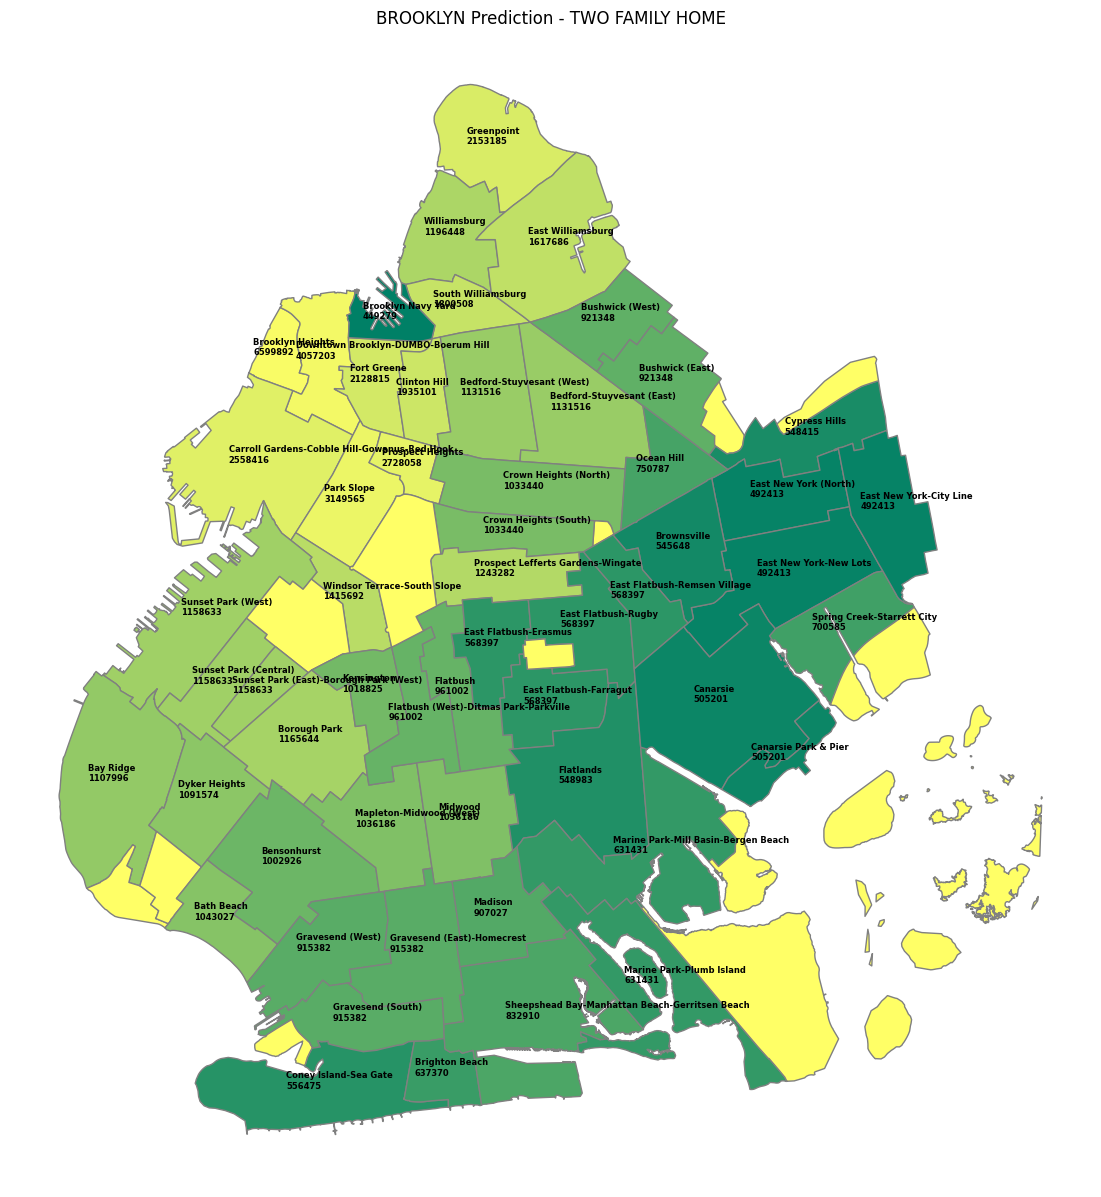

In [37]:
import matplotlib.pyplot as plt

shape['sales'] = "-"

# adding sales data to overall df
for i, row in shape.iterrows():
    holder = pairs[row['NTAName']]
    if holder:
        if isinstance(holder, list):
            sum = 0
            for e in holder:
                sum += dic_two[e]
            shape.at[i, 'sales'] = int(sum/len(holder))
        else:
            shape.at[i, 'sales'] = int(dic_two[holder])

# sets map settings
shape_map = shape.plot(column='sales', k=8, cmap='summer', figsize=(30,15), linewidth=1, edgecolor='0.5')
# adds labels to map
for i, row in shape.iterrows():
    x = row['geometry'].centroid.x
    y = row['geometry'].centroid.y
    if row['sales'] != "-" :
        label = row['NTAName'] + "\n" + str(row['sales'])
        shape_map.annotate(label, xy=(x, y), xytext=(-20, 0), color="black", textcoords="offset points", fontsize=6, weight="bold")
# draws the map
shape_map.set(title="BROOKLYN Prediction - TWO FAMILY HOME")
shape_map.set_axis_off()